In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [3]:
data = pd.read_csv('heart.csv')
data.shape

(303, 14)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


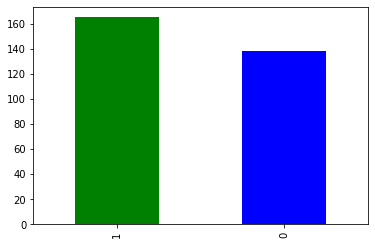

In [7]:
data['target'].value_counts().plot(kind='bar',color=['green','blue'])

In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
total_columns = len(data.columns)
total_columns

14

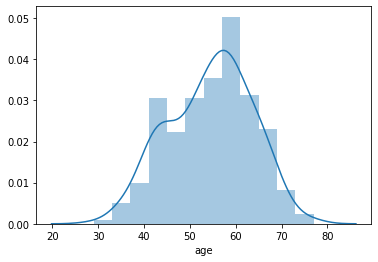

In [25]:
sns.distplot(data['age'])

In [27]:
pd.crosstab(data.target,data.sex)

sex,0,1
target,,
0,24,114
1,72,93


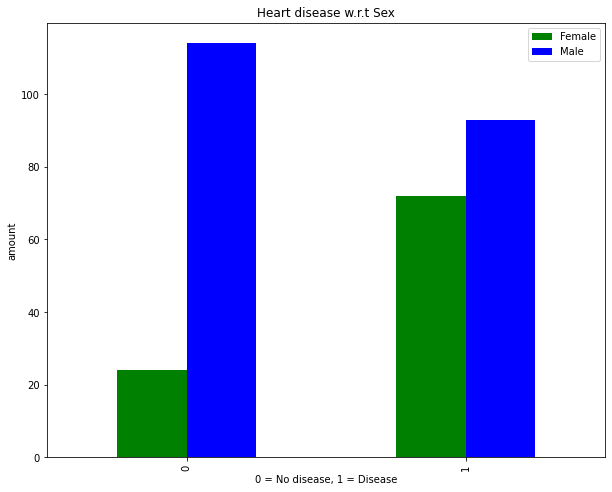

In [29]:
pd.crosstab(data.target,data.sex).plot(kind="bar",figsize=(10,8),color=["green","blue"])
plt.title("Heart disease w.r.t Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("amount")
plt.legend(["Female","Male"])

### Age vs Heart Rate

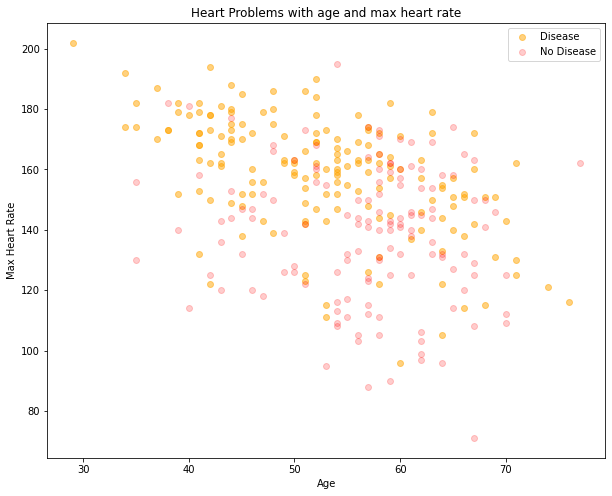

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(data.age[data.target==1],data.thalach[data.target==1],color="orange",alpha=0.5)
plt.scatter(data.age[data.target==0],data.thalach[data.target==0],color="red",alpha=0.2)
plt.title("Heart Problems with age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

In [39]:
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0, 0.5, 'age')

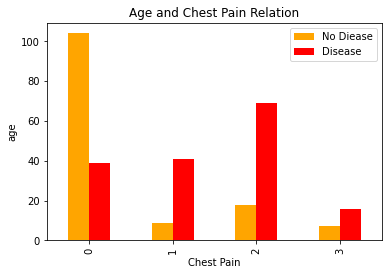

In [44]:
pd.crosstab(data.cp,data.target).plot(kind="bar",color=["Orange","Red"])
plt.title("Age and Chest Pain Relation")
plt.legend(["No Diease","Disease"])
plt.xlabel("Chest Pain")
plt.ylabel("age")